## Convolutional Neural Network (CNN)

Load the data from the site: http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html 

11501568/11490434 [==============================] - 4s 0us/step


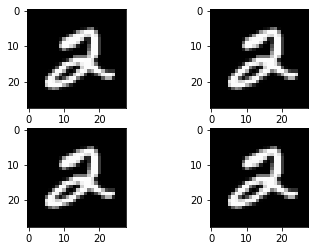

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
print(X_train[5])
print(y_train[5])



### Generating a NN for the classification (recognition) of the digits

In [2]:
# Baseline MLP for MNIST dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten ( from matrix to vector) 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# normalize inputs from 0-255 to 0-1 - Video Values for 8 bits
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
# build the model
model = baseline_model()
# Fit the model / trainning
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(model.summary())
print("Baseline Error: %.2f%%" % (100-scores[1]*100))



Epoch 1/10
300/300 - 5s - loss: 0.2800 - accuracy: 0.9202 - val_loss: 0.1457 - val_accuracy: 0.9563 - 5s/epoch - 15ms/step
Epoch 2/10
300/300 - 2s - loss: 0.1113 - accuracy: 0.9683 - val_loss: 0.0971 - val_accuracy: 0.9699 - 2s/epoch - 7ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0725 - accuracy: 0.9789 - val_loss: 0.0777 - val_accuracy: 0.9763 - 2s/epoch - 7ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0524 - accuracy: 0.9847 - val_loss: 0.0702 - val_accuracy: 0.9777 - 2s/epoch - 7ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0374 - accuracy: 0.9893 - val_loss: 0.0655 - val_accuracy: 0.9785 - 2s/epoch - 7ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0270 - accuracy: 0.9929 - val_loss: 0.0623 - val_accuracy: 0.9799 - 2s/epoch - 7ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0207 - accuracy: 0.9947 - val_loss: 0.0627 - val_accuracy: 0.9809 - 2s/epoch - 7ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0160 - accuracy: 0.9963 - val_loss: 0.0636 - val_accuracy: 0.9808 - 2s/epoch - 6ms/step
Epoch 9/10
300/300 - 2s

## Testing the same data set with th CNN

In [4]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define a simple CNN model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
#Visualization model
plot_model(model, to_file="number.png",show_shapes=True,expand_nested=True)
print(model.summary())
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("CNN Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/10
300/300 [==============================] - 15s 46ms/step - loss: 0.2292 - accuracy: 0.9344 - val_loss: 0.0671 - val_accuracy: 0.9798
Epoch 2/10
300/300 [==============================] - 14s 45ms/step - loss: 0.0689 - accuracy: 0.9795 - val_loss: 0.0535 - val_accuracy: 0.9826
Epoch 3/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0500 - accuracy: 0.9856 - val_loss: 0.0404 - val_accuracy: 0.9853
Epoch 4/10
300/300 [==============================] - 14s 45ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0341 - val_accuracy: 0.9893
Epoch 5/10
300/300 [==============================] - 14s 47ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.0361 - val_accuracy: 0.9872
Epoch 6/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0360 - val_accuracy: 0.9878
Epoch 7/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0327 - val_accuracy:

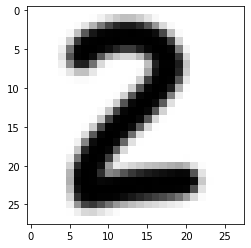

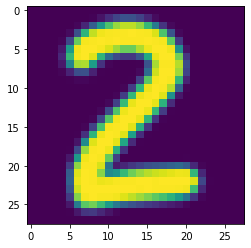

In [39]:
from matplotlib import image
from matplotlib import pyplot as plt
X_test = image.imread('number.png')
plt.imshow(X_test)
plt.show()
X_test.shape
img = np.zeros((28, 28, 1),dtype=float)
for i in range(len(X_test)):
    for j in range(len(X_test[0])):
        img[i][j] = [abs(1-X_test[i][j][0])]
plt.imshow(img)
plt.show()

In [40]:
print(img[0][0])
print(img.shape)

[0.]
(28, 28, 1)


In [43]:
img_db = np.zeros((1, 28, 28, 1), dtype=float)
img_db[0] = img
predictions = model.predict(
    img_db,
    batch_size=10,
    verbose=1
)

1/1 [==============================] - 0s 18ms/step


In [53]:
len(predictions[0])
score = max(predictions[0])
print(f"Image prediction: Image belongs to class {list(predictions[0]).index(score)} with score: {score}")

Image prediction: Image belongs to class 2 with score: 0.9999889135360718


In [38]:
# train and test are a db of (N, 28, 28, 1) images
X_train.shape[0]

60000